# Imports

In [1]:
import torch
from torch import nn
# from torchvision import datasets
from torch.utils.data import DataLoader, Dataset, random_split
# from torchvision import transforms
import os
import numpy as np
import pandas as pd
# from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

# Data prepration

In [3]:
# hIn_012 = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
# hIn_binary = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
hIn_5050_split = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

hIn_5050_split
# hIn_012
# hIn_binary

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [4]:
features_list = ['GenHlth', 'Stroke', 'HvyAlcoholConsump', 'Sex', 'CholCheck',
       'HeartDiseaseorAttack', 'HighBP', 'HighChol', 'Age', 'Veggies']

In [5]:
hIn_5050_split[features_list].head()
# hIn_binary[features_list].head()

,GenHlth,Stroke,HvyAlcoholConsump,Sex,CholCheck,HeartDiseaseorAttack,HighBP,HighChol,Age,Veggies
0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,1.0
1,3.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,12.0,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,13.0,1.0
3,3.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,11.0,1.0
4,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0,1.0


In [6]:
# X = hIn_binary[features_list].values
X = hIn_5050_split[features_list].values
X

array([[ 3.,  0.,  0., ...,  0.,  4.,  1.],
       [ 3.,  1.,  0., ...,  1., 12.,  0.],
       [ 1.,  0.,  0., ...,  0., 13.,  1.],
       ...,
       [ 5.,  0.,  0., ...,  1., 13.,  0.],
       [ 4.,  0.,  0., ...,  1., 11.,  0.],
       [ 2.,  0.,  0., ...,  1.,  9.,  0.]])

In [7]:
# Y = hIn_binary['Diabetes_binary'].values
Y = hIn_5050_split['Diabetes_binary'].values
Y

array([0., 0., 0., ..., 1., 1., 1.])

In [8]:
class CustomImageDataset(Dataset):
    def __init__(self, labels_list, features_list, transform=None):
        self.labels = labels_list
        self.features = features_list
        self.transform = transform
        self.num_data = len(features_list)

    def __len__(self):
        return self.num_data

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [9]:
dataset = CustomImageDataset(Y, X)

In [10]:
train_split_size = int(0.8 * len(X))
val_split_size = int(0.1 * len(X))
test_split_size = len(X) - (train_split_size + val_split_size) 
batch_size = train_split_size
num_features = len(features_list)

train_data , test_val_data = random_split(dataset, [train_split_size, val_split_size + test_split_size])
val_data , test_data = random_split(test_val_data, [val_split_size, test_split_size])

train_loader = DataLoader(train_data, batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size, shuffle=True)

In [11]:
for data, labels in train_loader:
    print(len(data))
    break

56553


# Building Model

In [12]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [28]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(num_features, 128),
            nn.ReLU(),
            nn.Linear(128, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 2),
            nn.Softmax(dim=1),
        )

        # self.layers = nn.Sequential(
        #     nn.Flatten(),
        #     nn.Linear(num_features, 100),
        #     nn.ReLU(),
        #     nn.Dropout(0.2),
        #     nn.BatchNorm1d(100),
        #     nn.Linear(100, 100),
        #     nn.ReLU(),
        #     nn.Dropout(0.2),
        #     nn.BatchNorm1d(100),
        #     nn.Linear(100, 100),
        #     nn.ReLU(),
        #     nn.Dropout(0.2),
        #     nn.BatchNorm1d(100),
        #     nn.Linear(100, 50),
        #     nn.ReLU(),
        #     nn.Dropout(0.2),
        #     nn.BatchNorm1d(50),
        #     nn.Linear(50, 10),
        #     nn.ReLU(),
        #     nn.Dropout(0.2),
        #     nn.BatchNorm1d(10),
        #     nn.Linear(10, 2),
        #     nn.Softmax(dim=1),
        # )

    def forward(self, x):
        return self.layers(x)

In [29]:
model = MLP()
model.to(device)

MLP(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=10, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=512, bias=True)
    (4): ReLU()
    (5): Linear(in_features=512, out_features=256, bias=True)
    (6): ReLU()
    (7): Linear(in_features=256, out_features=128, bias=True)
    (8): ReLU()
    (9): Linear(in_features=128, out_features=64, bias=True)
    (10): ReLU()
    (11): Linear(in_features=64, out_features=32, bias=True)
    (12): ReLU()
    (13): Linear(in_features=32, out_features=16, bias=True)
    (14): ReLU()
    (15): Linear(in_features=16, out_features=2, bias=True)
    (16): Softmax(dim=1)
  )
)

In [30]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=np.exp(np.log(0.1)/2000))
criterion = nn.CrossEntropyLoss()

# Training

In [31]:
min_valid_loss = np.inf

train_loss_list = []
val_loss_list = []

In [32]:
epochs = 1000

for e in range(epochs):
    train_loss = 0.0
    correct_preds_train = 0
    correct_preds_val = 0
    model.train()
    for data, labels in train_loader:
        
        data = data.type(torch.float32)
        labels = labels.type(torch.long)
        
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        optimizer.zero_grad()

        target = model(data)

        correct_preds_train += torch.sum(labels == torch.argmax(target, dim=1))

        loss = criterion(target,labels)

        loss.backward()

        optimizer.step()

        train_loss += loss.item()
    
    
    val_loss = 0.0
    model.eval()
    for data, labels in val_loader:
       
        data = data.type(torch.float32)
        labels = labels.type(torch.long)
        
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         

        target = model(data)

        correct_preds_val += torch.sum(labels == torch.argmax(target, dim=1))

        loss = criterion(target,labels)

        val_loss += loss.item()
    
    scheduler.step()
    # print(optimizer.param_groups[0]['lr'])

    train_loss_list.append(train_loss / len(train_loader))
    val_loss_list.append(val_loss / len(val_loader))
    train_acc = correct_preds_train / (train_split_size) * 100
    val_acc = correct_preds_val / (val_split_size) * 100
 
    print(f'Epoch {e+1}: \t Training Loss: {train_loss_list[-1]} \t Validation Loss: {val_loss_list[-1]}')
    print(f'             \t Training Acc: {train_acc} % \t Validation Acc: {val_acc} %')

    # Saving Best Model
    if min_valid_loss > val_loss_list[-1]:
        print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{val_loss_list[-1]:.6f}) \t Saving The Model')
        min_valid_loss = val_loss_list[-1]
         
        # Saving State Dict
        torch.save(model.state_dict(), 'saved_MLP_model.pth')
    print('------------------------------------------------------------------------------------------')

Epoch 1: 	 Training Loss: 0.693091869354248 	 Validation Loss: 0.6930223107337952
             	 Training Acc: 50.034481048583984 % 	 Validation Acc: 49.44122314453125 %
Validation Loss Decreased(inf--->0.693022) 	 Saving The Model
------------------------------------------------------------------------------------------
Epoch 2: 	 Training Loss: 0.6928915977478027 	 Validation Loss: 0.6928436756134033
             	 Training Acc: 50.034481048583984 % 	 Validation Acc: 49.44122314453125 %
Validation Loss Decreased(0.693022--->0.692844) 	 Saving The Model
------------------------------------------------------------------------------------------
Epoch 3: 	 Training Loss: 0.6927210688591003 	 Validation Loss: 0.6926935315132141
             	 Training Acc: 50.034481048583984 % 	 Validation Acc: 49.44122314453125 %
Validation Loss Decreased(0.692844--->0.692694) 	 Saving The Model
------------------------------------------------------------------------------------------
Epoch 4: 	 Training

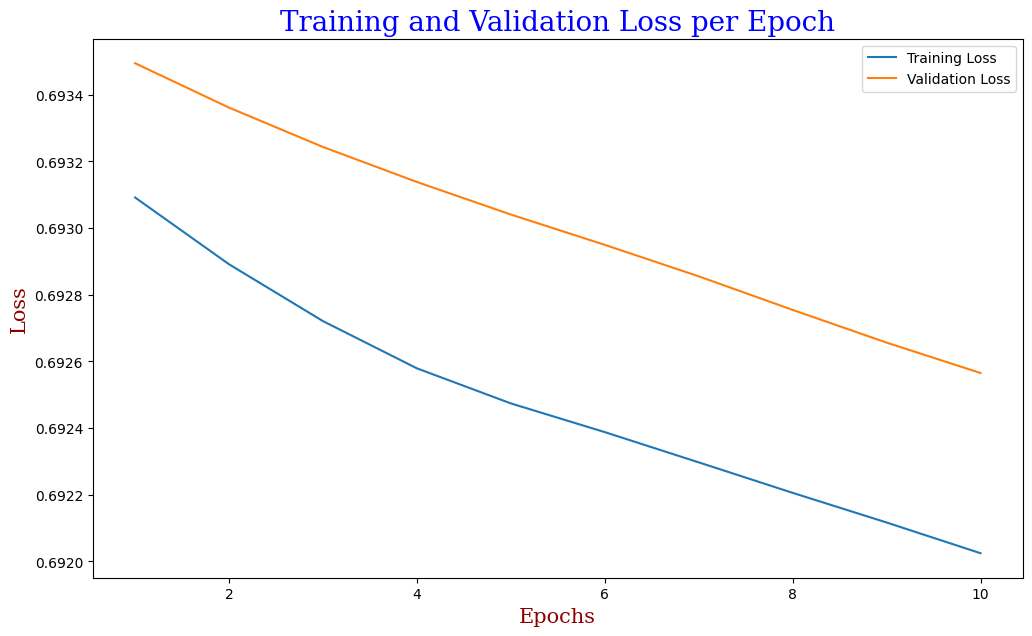

In [33]:
axis_x = [i for i in range(1, 1*epochs + 1)]


plt.figure(figsize = (12,7))

plt.plot(axis_x, train_loss_list, label='Training Loss')
plt.plot(axis_x, eval_loss_list, label='Validation Loss')


font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("Training and Validation Loss per Epoch", fontdict = font1)
plt.xlabel("Epochs", fontdict = font2)
plt.ylabel("Loss", fontdict = font2)

plt.legend()

plt.show()

# Evaluation

In [34]:
y_pred = []
y_true = []

model = MLP()
model.load_state_dict(torch.load('saved_MLP_model.pth', map_location=device))

model.eval()
for data, labels in test_loader:
    
    data = data.type(torch.float32)
    labels = labels.type(torch.long)
    if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
    
    output = model(data)

    output = (torch.max(torch.exp(output), 1)[1])
    y_pred.extend(output)
        
    labels = labels
    y_true.extend(labels)

Text(120.72222222222221, 0.5, 'Ground Truth')

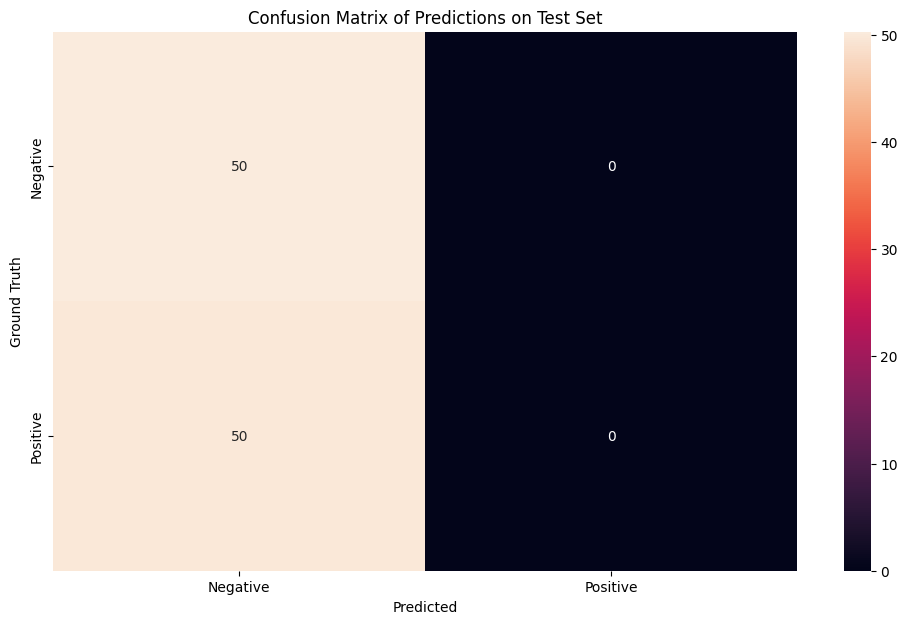

In [35]:
classes = ('Negative', 'Positive')

cf_matrix = torch.zeros(2, 2)
for i in range(len(y_pred)):
    cf_matrix[y_true[i]][y_pred[i]] += 1
cf_matrix = cf_matrix.numpy()
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) * 100, index = [i for i in classes], columns = [i for i in classes])
plt.figure(figsize = (12,7))
plt.title('Confusion Matrix of Predictions on Test Set')
sn.heatmap(df_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')
# plt.savefig('output.png')

In [36]:
correct_predictions = 0
for i in range(2):
    correct_predictions += cf_matrix[i][i]

print(f'Accuracy on test set: {round(correct_predictions / len(y_pred) * 100, 4)}%')

Accuracy on test set: 50.2829%
